In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
data1 = pd.read_excel('NS_reven.xlsx', 'rawdata_2019(완)', index=False)
data2 = pd.read_excel('NS_rate.xlsx', '시간대', index=False)

In [4]:
ns_rev = data1.rename(columns=data1.iloc[0])
NS_rev = ns_rev.drop(ns_rev.index[0])
ns_rate = data2.rename(columns=data2.iloc[0])
NS_rate = ns_rate.drop(ns_rate.index[0])

NS_rate.head()

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
1,02:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.003
2,02:01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.012,0.003
3,02:02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.004
4,02:03,0,0,0.014,0,0,0,0,0,0,...,0,0,0.017,0,0,0,0,0,0,0.004
5,02:04,0,0,0,0,0,0,0,0,0,...,0,0,0.017,0,0,0,0,0,0,0.004


In [5]:
NS_rev["방송일시"] = pd.to_datetime(NS_rev["방송일시"])
NS_rev.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
1,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000
2,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000
3,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000
4,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000
5,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000


In [6]:

NS_rev["month"] = NS_rev['방송일시'].dt.month
NS_rev["day_of_month"] = NS_rev['방송일시'].dt.day
NS_rev["day_of_week"]  = NS_rev['방송일시'].dt.dayofweek
NS_rev["time"] = NS_rev['방송일시'].dt.time
NS_rev["hour"] = NS_rev['방송일시'].dt.hour
NS_rev["minute"] = NS_rev['방송일시'].dt.minute

NS_rev.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,day_of_month,day_of_week,time,hour,minute
1,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,1,1,1,06:00:00,6,0
2,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,1,1,1,06:00:00,6,0
3,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,1,1,1,06:20:00,6,20
4,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,1,1,1,06:20:00,6,20
5,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,1,1,1,06:40:00,6,40


---

## Data 형태 확인

In [7]:
NS_rev.shape

(38309, 14)

In [8]:
NS_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38309 entries, 1 to 38309
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   방송일시          38309 non-null  datetime64[ns]
 1   노출(분)         21525 non-null  object        
 2   마더코드          38309 non-null  object        
 3   상품코드          38309 non-null  object        
 4   상품명           38309 non-null  object        
 5   상품군           38309 non-null  object        
 6   판매단가          38309 non-null  object        
 7   취급액           37372 non-null  object        
 8   month         38309 non-null  int64         
 9   day_of_month  38309 non-null  int64         
 10  day_of_week   38309 non-null  int64         
 11  time          38309 non-null  object        
 12  hour          38309 non-null  int64         
 13  minute        38309 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 4.4+ MB


새로 추가한 datetime 열들을 제외하면 모두 명목형 > 전처리를 거친 후 판매단가/취급액은 숫자형으로 바꿀 필요가 있음

In [9]:
NS_rate.shape

(1441, 367)

In [10]:
NS_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1441 entries, 1 to 1441
Columns: 367 entries, 시간대 to 2019-01-01 to 2019-12-31
dtypes: object(367)
memory usage: 4.0+ MB


In [11]:
NS_rev.isnull().sum()

방송일시                0
노출(분)           16784
마더코드                0
상품코드                0
상품명                 0
상품군                 0
판매단가                0
취급액               937
month               0
day_of_month        0
day_of_week         0
time                0
hour                0
minute              0
dtype: int64

In [12]:
np.sum((NS_rate.isna().sum()!=0))

0

실적 데이터에서 NA 값들이 상당히 많다  
취급액 중 NA값들은 판매단가가 0인 무형 상품들 (여행 상품, 렌탈 서비스, 핸드폰)  
유의 사항에 이 항목들은 추정에서 제외시킨다 하니 모델링 과정에서도 제외해도 될 듯  
마찬가지로 토요일 18:00~18:20 역시 정보 방송 시간으로 제외 (raw data에서도 공백)  

* timestamp 별로 새로운 열 생성  
* 노출 시간의 NA 값들은 다음 행과 해당 행의 시간차로 확인됨  
* 또는 같은 시간대에 여러 제품을 판매한다면 대표 행 외 나머지 행의 노출 시간은 NA로 표시  
* 노출 시간은 대부분 20분이지만, 가끔 30분인 경우가 존재하므로, imputation을 두가지 방법으로 해야 할 것 같음
* 같은 시간대에도 비슷한 제품 여러개를 판매하는 경우 시간대가 중복되고, 상품명만 달리 표시됨 (마더코드 동일, 상품코드 상이)


---

## NA Handling 
#### 제거 가능한 것들만 / imputation은 추후에

In [13]:
NS_rev = NS_rev[NS_rev['취급액'].notnull()]
NS_rev.isnull().sum()

방송일시                0
노출(분)           16784
마더코드                0
상품코드                0
상품명                 0
상품군                 0
판매단가                0
취급액                 0
month               0
day_of_month        0
day_of_week         0
time                0
hour                0
minute              0
dtype: int64

In [14]:
NS_rev.shape

(37372, 14)

---

## 분포 시각화

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

### 노출(분)

In [16]:
x1 = NS_rev['노출(분)']
x1 = x1[x1.notnull()]
x1.astype(float)

1        20.0
3        20.0
5        20.0
7        20.0
8        20.0
         ... 
38286    20.0
38288    20.0
38293    20.0
38297    20.0
38301    20.0
Name: 노출(분), Length: 20588, dtype: float64

In [17]:
x1.sort_values()[:20]

6691     2.46667
9538     2.81667
14026          3
14978          3
18533    3.16667
26450    3.28333
35964       3.45
24780    5.16667
22693    5.16667
23899    5.16667
25921    5.33333
29466    5.46667
37739    6.63333
34864    6.66667
31055    6.68333
28050       6.85
28592       6.85
26921    7.26667
24373       8.85
34530        9.7
Name: 노출(분), dtype: object

노출 시간이 10분보다 작은 것들이 있는데, 단순한 입력 오류인지 아니면 실제 다음 품목 방송까지 중간 광고가 있었는지 확인이 어렵다

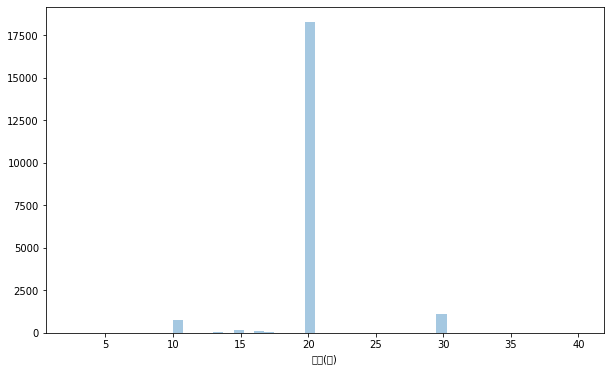

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(x1, kde=False)
plt.show()

### 마더코드

In [19]:
x2 = NS_rev['마더코드']
x2 = x2[x2.notnull()]

len(x2)

37372

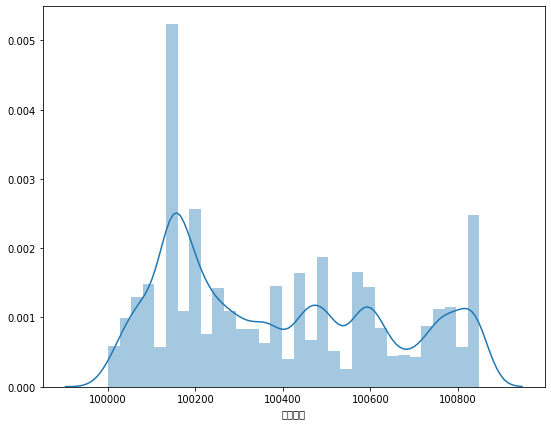

In [20]:
fig, ax = plt.subplots(figsize=(9, 7))
a = sns.distplot(x2)
plt.show()

In [21]:
x2.mode()

0    100148
dtype: object

100148이 압도적 최빈값 (2618개)  
확인해보니, LG 울트라HD TV들 

In [23]:
from collections import Counter

Counter(x2).most_common(n=15)

[(100148, 2618),
 (100837, 1507),
 (100448, 1308),
 (100205, 792),
 (100500, 702),
 (100203, 666),
 (100372, 639),
 (100575, 636),
 (100155, 620),
 (100150, 604),
 (100149, 540),
 (100074, 488),
 (100610, 465),
 (100765, 444),
 (100577, 408)]

In [24]:
LG_TV = NS_rev[NS_rev['마더코드']==100148]
LG_TV = LG_TV['상품코드']
len(LG_TV)

2618

In [25]:
Counter(LG_TV).most_common(n=20)

[(200501, 120),
 (200434, 120),
 (200510, 120),
 (200443, 120),
 (200519, 120),
 (200452, 120),
 (200524, 120),
 (200456, 120),
 (200505, 54),
 (200438, 54),
 (200514, 54),
 (200447, 54),
 (200528, 54),
 (200460, 54),
 (200503, 39),
 (200436, 39),
 (200512, 39),
 (200445, 39),
 (200521, 39),
 (200454, 39)]

같은 LG TV라도 상품코드는 다양함  
대신 2005 : 일시불 / 2004 : 할부 

### 상품코드

In [26]:
x3 = NS_rev['상품코드']
x3 = x3[x3.notnull()]

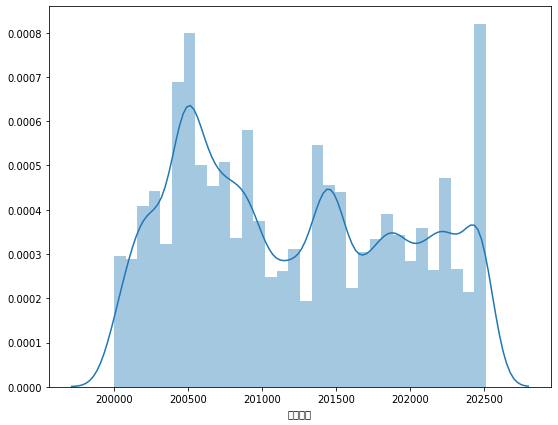

In [27]:
fig, ax = plt.subplots(figsize=(9, 7))
a = sns.distplot(x3)
plt.show()

In [28]:
Counter(x3).most_common(n=15)

[(200864, 318),
 (200868, 282),
 (200533, 273),
 (200465, 273),
 (200014, 252),
 (200236, 198),
 (200556, 192),
 (200489, 192),
 (202467, 191),
 (202480, 191),
 (202470, 191),
 (202473, 191),
 (201378, 177),
 (201376, 177),
 (201379, 177)]

200864 : 안동 간고등어 20팩  
200868 : 한일 분쇄 믹서기  
등 단일 품목은 마더코드와 무관해보임

### 상품군

In [29]:
x4 = NS_rev['상품군']
x4 = x4[x4.notnull()]

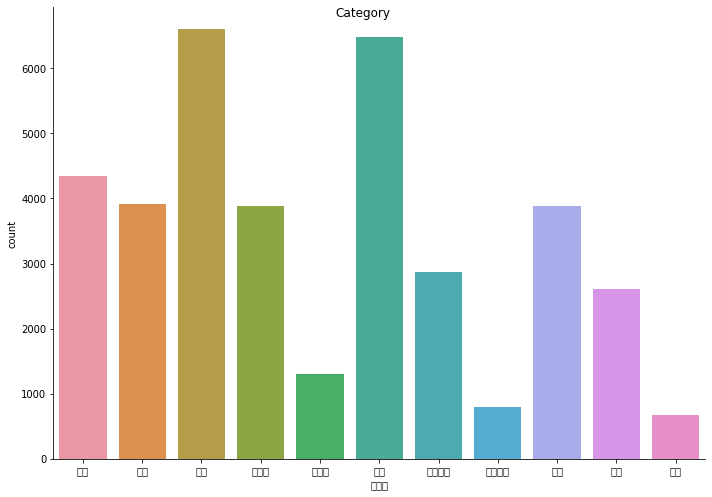

In [42]:
a = sns.catplot(x='상품군', data=NS_rev, kind='count', height=7, aspect=1.4)
a.fig.suptitle('Category')
plt.show()

In [43]:
Counter(x4).most_common()

[('주방', 6604),
 ('가전', 6479),
 ('의류', 4340),
 ('속옷', 3919),
 ('잡화', 3891),
 ('농수축', 3884),
 ('생활용품', 2877),
 ('가구', 2614),
 ('이미용', 1305),
 ('건강기능', 790),
 ('침구', 669)]

### 판매단가

In [45]:
x5 = NS_rev['판매단가']
x5 = x5[x5.notnull()]
x5.astype(float)

1         39900.0
2         39900.0
3         39900.0
4         39900.0
5         39900.0
           ...   
38300    148000.0
38301    178000.0
38302    168000.0
38303    158000.0
38304    148000.0
Name: 판매단가, Length: 37372, dtype: float64

In [47]:
x5.sort_values()[-20:]

9569     3990000
10411    3990000
31493    4250000
30966    4250000
30163    4250000
30156    4250000
30973    4250000
31500    4250000
31494    5060000
30157    5060000
30150    5060000
31487    5060000
30967    5060000
30960    5060000
30965    7930000
31492    7930000
31499    7930000
30972    7930000
30162    7930000
30155    7930000
Name: 판매단가, dtype: object

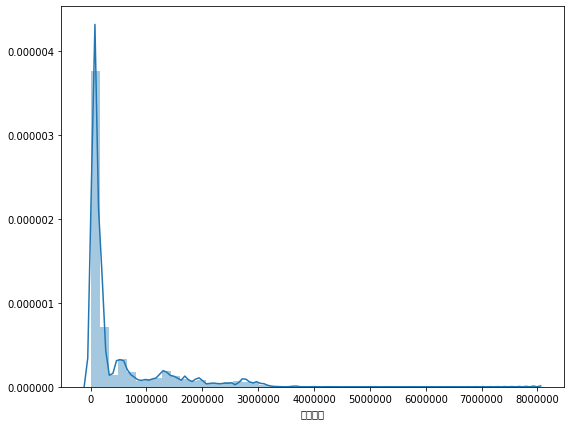

In [53]:
fig, ax = plt.subplots(figsize=(9, 7))
a = sns.distplot(x5)
plt.show()

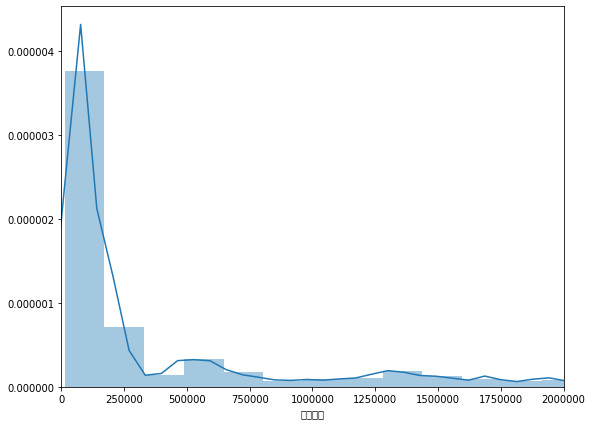

In [56]:
fig, ax = plt.subplots(figsize=(9, 7))
ax = sns.distplot(x5)
ax.set_xlim(0,2000000)
plt.show()

### 취급액

In [66]:
x6 = NS_rev['취급액']
x6 = x6[x6.notnull()]
x6.astype(float)

1          2099000.0
2          4371000.0
3          3262000.0
4          6955000.0
5          6672000.0
            ...     
38300     10157000.0
38301     50929000.0
38302    104392000.0
38303     13765000.0
38304     46608000.0
Name: 취급액, Length: 37372, dtype: float64

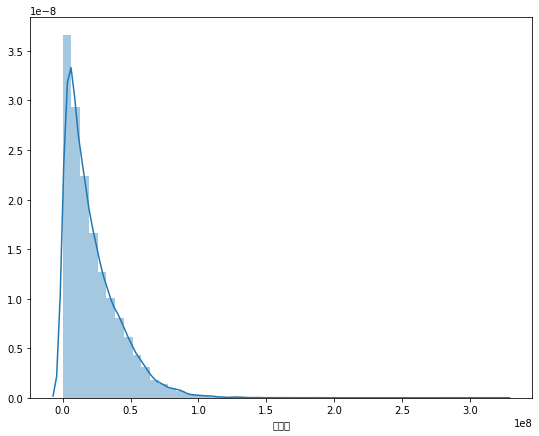

In [73]:
fig, ax = plt.subplots(figsize=(9, 7))
a = sns.distplot(x6)
plt.show()

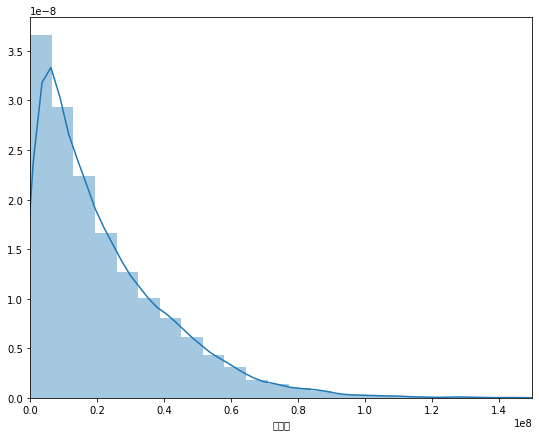

In [78]:
fig, ax = plt.subplots(figsize=(9, 7))
ax = sns.distplot(x6)
ax.set_xlim(0,150000000)
plt.show()

In [74]:
x6.sort_values()[-20:]

37355    154906000
35047    157780000
34668    161654000
36885    162828000
35025    166635000
38086    167261000
33867    169907000
37438    177875000
26449    181886000
34903    185927000
36268    187419000
33179    199541000
37257    216065000
37357    223492000
34907    225084000
32372    228177000
35046    231789000
34386    241079000
37862    270284000
35785    322009000
Name: 취급액, dtype: object

## 새 변수 생성
### 취급액 / 판매단가 = 주문량

In [79]:
NS_rev['주문량'] = NS_rev['취급액'] / NS_rev['판매단가']
NS_rev.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,day_of_month,day_of_week,time,hour,minute,주문량
1,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,1,1,1,06:00:00,6,0,52.6065
2,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,1,1,1,06:00:00,6,0,109.549
3,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,1,1,1,06:20:00,6,20,81.7544
4,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,1,1,1,06:20:00,6,20,174.311
5,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,1,1,1,06:40:00,6,40,167.218
